In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/bquxjob_19736c85_1955e49fb42.csv"
df = pd.read_csv(file_path)

In [ ]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nColumns in the dataset:")
print(df.columns.tolist())

print("\nDataFrame info:")
print(df.info())

print("\nNull values per column:")
print(df.isnull().sum())


First 5 rows of the dataset:
                                          block_hash  block_number  \
0  0x009181ca956243eb064f2ca30f0c5c8fb73989ecaa69...      18908911   
1  0x009181ca956243eb064f2ca30f0c5c8fb73989ecaa69...      18908911   
2  0x009181ca956243eb064f2ca30f0c5c8fb73989ecaa69...      18908911   
3  0x009181ca956243eb064f2ca30f0c5c8fb73989ecaa69...      18908911   
4  0x009181ca956243eb064f2ca30f0c5c8fb73989ecaa69...      18908911   

                  block_timestamp  \
0  2024-01-01 00:03:23.000000 UTC   
1  2024-01-01 00:03:23.000000 UTC   
2  2024-01-01 00:03:23.000000 UTC   
3  2024-01-01 00:03:23.000000 UTC   
4  2024-01-01 00:03:23.000000 UTC   

                                    transaction_hash  transaction_index  \
0  0xacfdd9e65508a82c9855cb0e16d2345ce78e3e514fb2...                145   
1  0x48f50dc7b66f35e92890cfdc649e60f7304459d0beaf...                143   
2  0x0e5ccadae6becb3b9f90155aa8cb5557b398a8923448...                 28   
3  0x8bf3df06bb46cd302861c2

In [ ]:
# Convert block_timestamp to datetime
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'].str.replace(' UTC', ''))

In [ ]:
print("\nTimestamp Range:")
print(df['block_timestamp'].min(), "to", df['block_timestamp'].max())


Timestamp Range:
2024-01-01 00:00:11 to 2024-01-01 02:15:35


In [ ]:
# Convert quantity to numeric
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

In [ ]:
print("\nNumber of duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates(subset=['transaction_hash', 'event_index'])


Number of duplicate rows: 0


In [ ]:
print("\nEvent Type Distribution:")
print(df['event_type'].value_counts())


Event Type Distribution:
event_type
ERC-20      16579
ERC-721      2901
ERC-1155      483
Name: count, dtype: int64


In [ ]:
# Top 5 senders and receivers
print("\nTop 5 from_address:")
print(df['from_address'].value_counts().head(5))

print("\nTop 5 to_address:")
print(df['to_address'].value_counts().head(5))

# Token ID missing percentage and top token_ids
token_id_missing_pct = df['token_id'].isnull().mean() * 100
print("\nToken ID missing %:", token_id_missing_pct)

print("\nTop Token IDs:")
print(df[df['token_id'].notnull()]['token_id'].value_counts().head())


Top 5 from_address:
from_address
0x0000000000000000000000000000000000000000    4195
0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad     623
0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43     298
0x74de5d4fcbf63e00296fd95d33236b9794016631     230
0xdef1c0ded9bec7f1a1670819833240f027b25eff     159
Name: count, dtype: int64

Top 5 to_address:
to_address
0x996e1d4ce3e1e558889832832004b2466153adbe    712
0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43    440
0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad    433
0x61fbb052daf37a3b50616669a10c4778f08f3c6f    400
0xb84b3a7c5d325ebe5b5fc8482529b37d6298207d    280
Name: count, dtype: int64

Token ID missing %: 83.04863998397035

Top Token IDs:
token_id
1    162
5     48
2     23
4     14
3     14
Name: count, dtype: int64


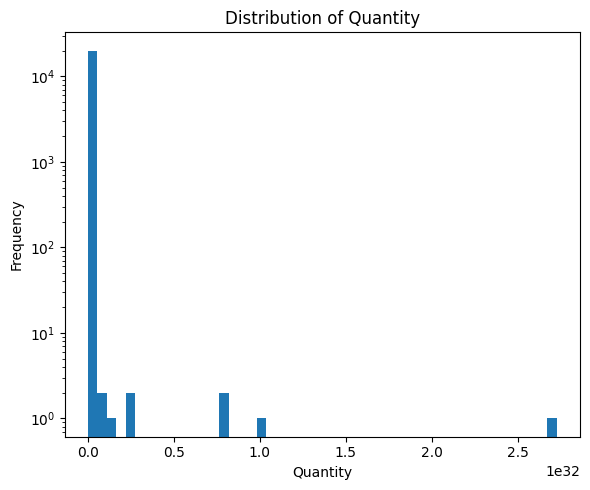

In [ ]:
# Distribution of quantity
plt.figure(figsize=(6, 5))
df['quantity'].plot.hist(bins=50, log=True, title='Distribution of Quantity')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()


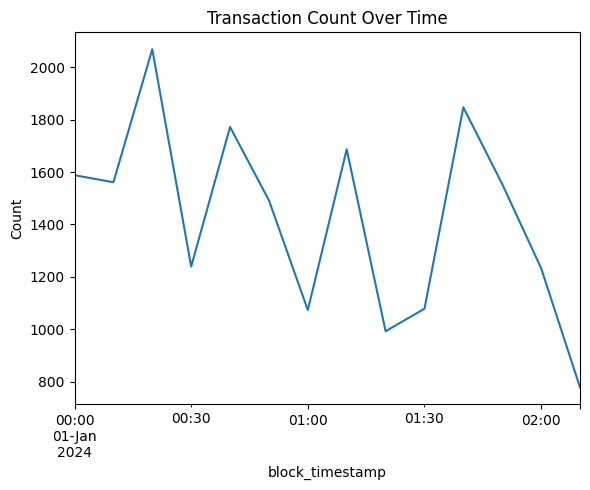

In [ ]:
# Transaction count over time
plt.figure(figsize=(6, 5))
df.set_index('block_timestamp')['transaction_hash'].resample('10min').count().plot(title='Transaction Count Over Time')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
print("\nFull Data Summary:")
print(df.describe(include='all'))



Full Data Summary:
                                               block_hash  block_number  \
count                                               19963  1.996300e+04   
unique                                                270           NaN   
top     0x4c2ca1b52069de9cd2669d7c147f5a529a5d64bc5129...           NaN   
freq                                                  537           NaN   
mean                                                  NaN  1.890921e+07   
min                                                   NaN  1.890890e+07   
25%                                                   NaN  1.890903e+07   
50%                                                   NaN  1.890919e+07   
75%                                                   NaN  1.890939e+07   
max                                                   NaN  1.890956e+07   
std                                                   NaN  1.958186e+02   

                      block_timestamp  \
count                           19963 

In [ ]:
df.to_csv("/content/cleaned_dataset.csv", index=False)

In [ ]:
cleaned_df = pd.read_csv("/content/cleaned_dataset.csv")

print("Number of rows in cleaned dataset:", len(cleaned_df))

Number of rows in cleaned dataset: 19963


In [ ]:
sampled_df = cleaned_df.sample(n=10000, random_state=42)

sampled_df.to_csv("/content/cleaned_sampled_10000.csv", index=False)

print("Sampled dataset shape:", sampled_df.shape)


Sampled dataset shape: (10000, 11)
